In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os


In [2]:
qa_data = pd.read_csv('~/Downloads/qa_evaluations_20241130.csv')

In [3]:
qa_data

,timestamp,query,answer,helpfulness_score,relevance_score,accuracy_score,depth_score,creativity_score,level_of_detail_score,feedback
0,2024-11-30T11:06:34.437302,Who were the candidates in the 2020 US election?,Answer:\n The candidates in the 2020 US...,4.0,5.0,5.0,2.0,1.0,3.0,**Rating and Explanation:**\n\n- **Helpfulness...
1,2024-11-30T11:07:58.207692,What were the major campaign promises of Joe B...,"Based on the sources provided, here are Joe Bi...",4.0,5.0,5.0,4.0,2.0,4.0,**My ratings and explanations:**\n\n1. **Helpf...
2,2024-11-30T11:10:06.989339,What were the key critiques of Donald Trump’s ...,"Based on the sources, key critiques of Donald ...",4.0,5.0,4.0,3.0,2.0,3.0,**Rating and Explanation:**\n\n* **Helpfulness...
3,2024-11-30T11:14:10.794988,How did the candidates engage with Latino voters?,"- If the answer can be deduced, provide the an...",4.0,5.0,4.0,4.0,2.0,3.0,**Rating and Explanation**\n\n* **Helpfulness:...
4,2024-11-30T11:17:16.058098,How was the response to the pandemic discussed...,"Based on the sources, here's the answer to the...",4.0,5.0,5.0,4.0,2.0,4.0,**Answer:**\n\nHere's the rating with brief ex...
5,2024-11-30T11:18:24.339699,What was the coverage of voter fraud or irregu...,.\n\nCoverage of voter fraud or irregularities...,4.0,5.0,5.0,4.0,2.0,5.0,**My ratings:**\n\n* **Helpfulness: 4** - The ...
6,2024-11-30T11:19:37.083619,What were the pivotal swing states in the 2020...,"Based on the provided sources, the pivotal swi...",5.0,5.0,5.0,4.0,2.0,4.0,**My ratings and explanations:**\n\n* **Helpfu...
7,2024-11-30T11:21:03.931927,What were the reactions to Biden's victory in ...,Reactions to Biden's victory in English vs. Sp...,4.0,5.0,5.0,4.0,2.0,4.0,**My ratings and explanations:**\n\n* **Helpfu...
8,2024-11-30T11:22:29.033098,How was climate change addressed in the campai...,Climate change was addressed in the 2020 US Pr...,4.0,5.0,4.0,4.0,2.0,4.0,**Rating and Explanation**\n\n* **Helpfulness:...
9,2024-11-30T11:23:30.731716,What was the reaction to Donald Trump’s refusa...,Reaction to Donald Trump's refusal to concede ...,4.0,5.0,5.0,4.0,2.0,4.0,**Answer:**\n\nHere's the rating with brief ex...


In [4]:
human_eval = pd.read_csv('~/Downloads/Human Eval Spreadsheet  - Sheet1.csv')

In [5]:
human_eval

,Prompt,Output,Helpfulness,Relevance,Accuracy,Depth,Creativity,Level of Detail,Feedback,Group
0,Who were the candidates in the 2020 US election?,The candidates in the 2020 US Presidential Ele...,5.0,5.0,5.0,2.0,2.0,3.0,"Not a very in-depth answer, but that was also ...",Election Candidates and Campaigns
1,What were the major campaign promises of Joe B...,"Based on the sources provided, here are Joe Bi...",5.0,5.0,5.0,2.0,2.0,4.0,very brief,Election Candidates and Campaigns
2,What were the key critiques of Donald Trump’s ...,"Based on the sources, key critiques of Donald ...",4.0,4.0,4.0,2.0,2.0,2.0,Covered main critiques but fell flat in terms ...,Election Outcomes and Their Implications
3,How did the candidates engage with Latino voters?,"- If the answer can be deduced, provide the an...",5.0,3.0,5.0,4.0,3.0,4.0,Deduction was unnecessary and irrelevant,Voter Engagement and Demographics
4,How was the response to the pandemic discussed...,The response to the pandemic was discussed dur...,5.0,4.0,5.0,4.0,3.0,5.0,s,Voter Engagement and Demographics
5,What was the coverage of voter fraud or irregu...,Coverage of voter fraud or irregularities in t...,5.0,5.0,4.0,4.0,2.0,5.0,s,Election Outcomes and Their Implications
6,What were the pivotal swing states in the 2020...,"Based on the provided sources, the pivotal swi...",5.0,5.0,5.0,4.0,2.0,4.0,s,Voter Engagement and Demographics
7,What were the reactions to Biden's victory in ...,Reactions to Biden's victory in English vs. Sp...,4.0,3.0,3.0,3.0,3.0,3.0,"Quotes are not translated, Irish media doesn't...",Election Outcomes and Their Implications
8,How was climate change addressed in the campai...,Climate change was addressed in the 2020 US Pr...,4.0,4.0,4.0,3.0,2.0,3.0,This statement does not make a lot of sense to...,Election Candidates and Campaigns
9,What was the reaction to Donald Trump’s refusa...,Reaction to Donald Trump's refusal to concede ...,4.0,4.0,5.0,3.0,2.0,3.0,"Quotes are not translated, reactions come from...",Election Outcomes and Their Implications


In [6]:
human_eval = human_eval.dropna()
human_eval


,Prompt,Output,Helpfulness,Relevance,Accuracy,Depth,Creativity,Level of Detail,Feedback,Group
0,Who were the candidates in the 2020 US election?,The candidates in the 2020 US Presidential Ele...,5.0,5.0,5.0,2.0,2.0,3.0,"Not a very in-depth answer, but that was also ...",Election Candidates and Campaigns
1,What were the major campaign promises of Joe B...,"Based on the sources provided, here are Joe Bi...",5.0,5.0,5.0,2.0,2.0,4.0,very brief,Election Candidates and Campaigns
2,What were the key critiques of Donald Trump’s ...,"Based on the sources, key critiques of Donald ...",4.0,4.0,4.0,2.0,2.0,2.0,Covered main critiques but fell flat in terms ...,Election Outcomes and Their Implications
3,How did the candidates engage with Latino voters?,"- If the answer can be deduced, provide the an...",5.0,3.0,5.0,4.0,3.0,4.0,Deduction was unnecessary and irrelevant,Voter Engagement and Demographics
4,How was the response to the pandemic discussed...,The response to the pandemic was discussed dur...,5.0,4.0,5.0,4.0,3.0,5.0,s,Voter Engagement and Demographics
5,What was the coverage of voter fraud or irregu...,Coverage of voter fraud or irregularities in t...,5.0,5.0,4.0,4.0,2.0,5.0,s,Election Outcomes and Their Implications
6,What were the pivotal swing states in the 2020...,"Based on the provided sources, the pivotal swi...",5.0,5.0,5.0,4.0,2.0,4.0,s,Voter Engagement and Demographics
7,What were the reactions to Biden's victory in ...,Reactions to Biden's victory in English vs. Sp...,4.0,3.0,3.0,3.0,3.0,3.0,"Quotes are not translated, Irish media doesn't...",Election Outcomes and Their Implications
8,How was climate change addressed in the campai...,Climate change was addressed in the 2020 US Pr...,4.0,4.0,4.0,3.0,2.0,3.0,This statement does not make a lot of sense to...,Election Candidates and Campaigns
9,What was the reaction to Donald Trump’s refusa...,Reaction to Donald Trump's refusal to concede ...,4.0,4.0,5.0,3.0,2.0,3.0,"Quotes are not translated, reactions come from...",Election Outcomes and Their Implications


In [15]:
human_eval.columns

Index(['Prompt', 'Output', 'Helpfulness', 'Relevance', 'Accuracy', 'Depth',
       'Creativity', 'Level of Detail', 'Feedback'],
      dtype='object')

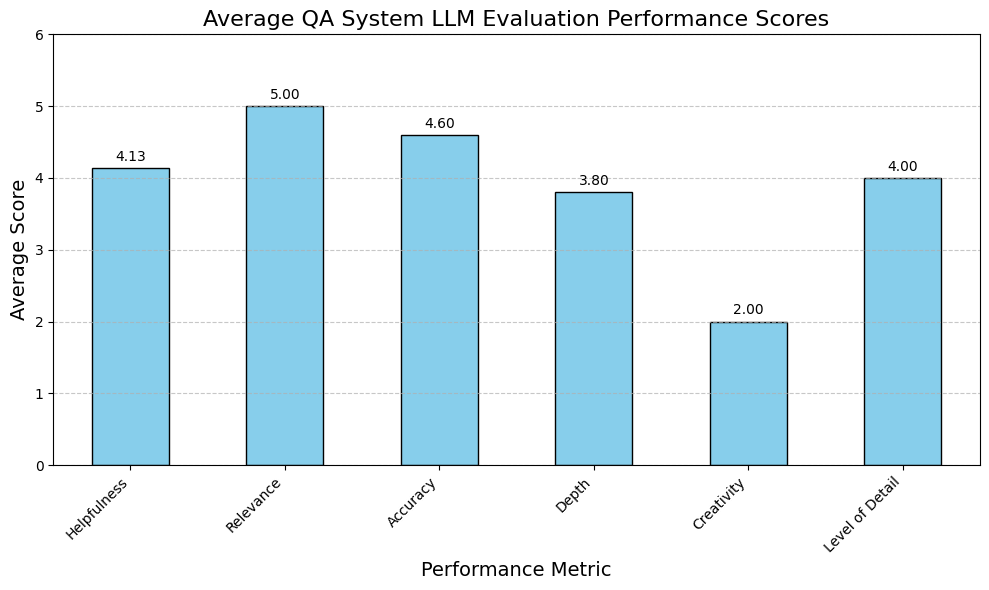

In [44]:
average_scores = qa_data[['helpfulness_score', 'relevance_score', 'accuracy_score', 
                          'depth_score', 'creativity_score', 'level_of_detail_score']].mean()
clean_labels = ['Helpfulness', 'Relevance', 'Accuracy', 'Depth', 'Creativity', 'Level of Detail']

plt.figure(figsize=(10, 6))
for i, v in enumerate(average_scores):
    plt.text(i, v + 0.1, f'{v:.2f}', ha='center')
average_scores.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Average QA System LLM Evaluation Performance Scores', fontsize=16)
plt.ylabel('Average Score', fontsize=14)
plt.xlabel('Performance Metric', fontsize=14)
plt.ylim(0, 6)
plt.xticks(rotation=45, ha='right')
plt.xticks(range(len(clean_labels)), clean_labels, rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()


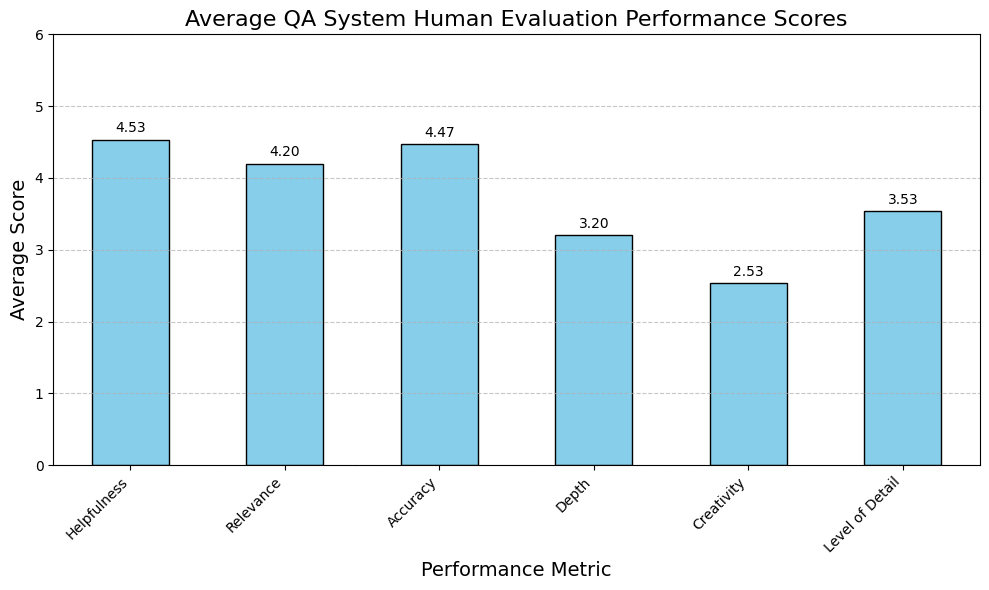

In [45]:
average_scores = human_eval[['Helpfulness', 'Relevance', 'Accuracy', 'Depth',
       'Creativity', 'Level of Detail']].mean()

plt.figure(figsize=(10, 6))
for i, v in enumerate(average_scores):
    plt.text(i, v + 0.1, f'{v:.2f}', ha='center')
average_scores.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Average QA System Human Evaluation Performance Scores', fontsize=16)
plt.ylabel('Average Score', fontsize=14)
plt.xlabel('Performance Metric', fontsize=14)
plt.ylim(0, 6)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()


/var/folders/gj/wskdhgs57hn0jbs49qnhz9nh0000gn/T/ipykernel_90343/3006140863.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=g, y='group', data=grouped_scores, palette='viridis')


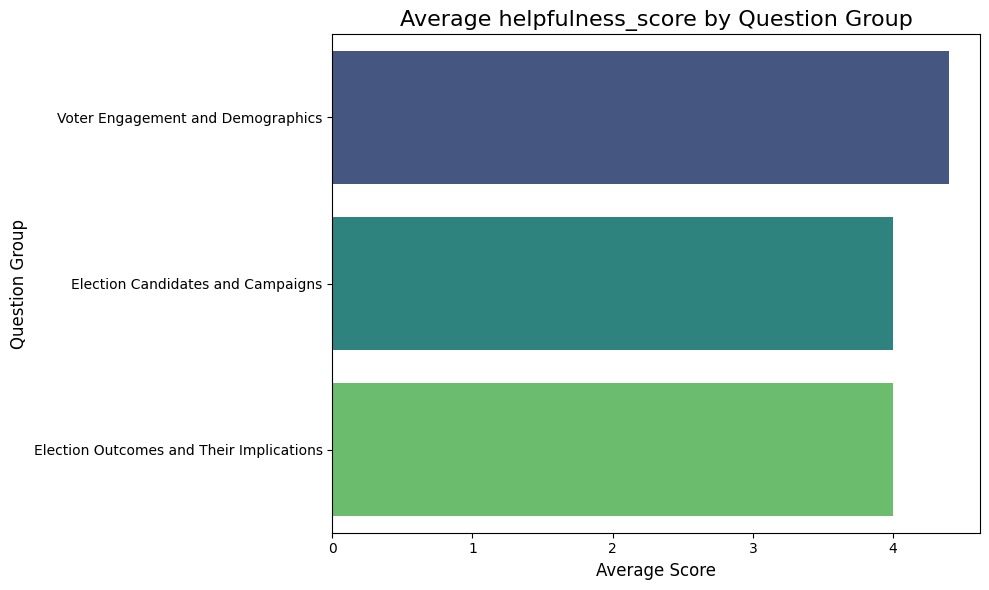

/var/folders/gj/wskdhgs57hn0jbs49qnhz9nh0000gn/T/ipykernel_90343/3006140863.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=g, y='group', data=grouped_scores, palette='viridis')


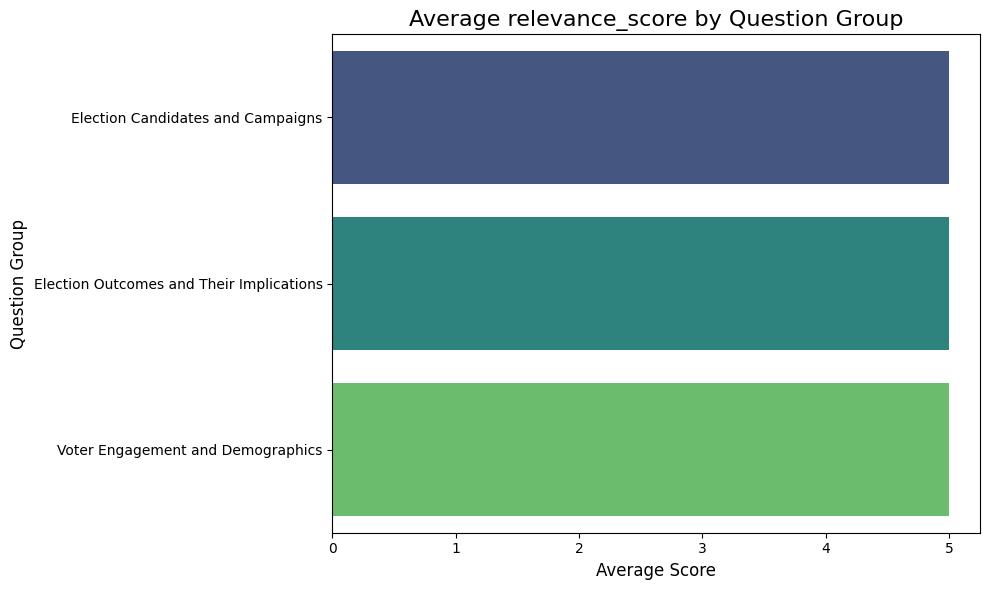

/var/folders/gj/wskdhgs57hn0jbs49qnhz9nh0000gn/T/ipykernel_90343/3006140863.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=g, y='group', data=grouped_scores, palette='viridis')


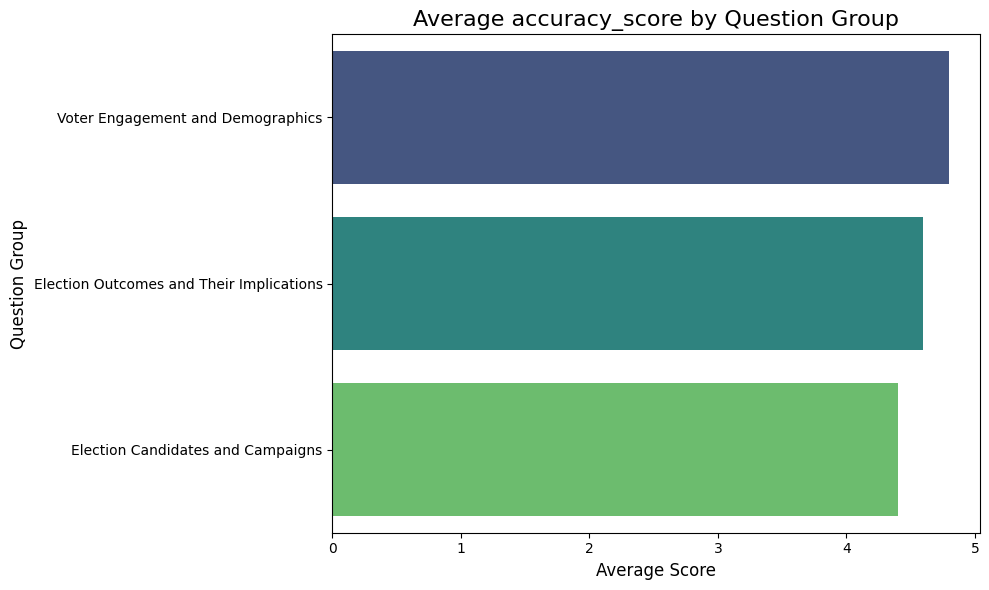

/var/folders/gj/wskdhgs57hn0jbs49qnhz9nh0000gn/T/ipykernel_90343/3006140863.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=g, y='group', data=grouped_scores, palette='viridis')


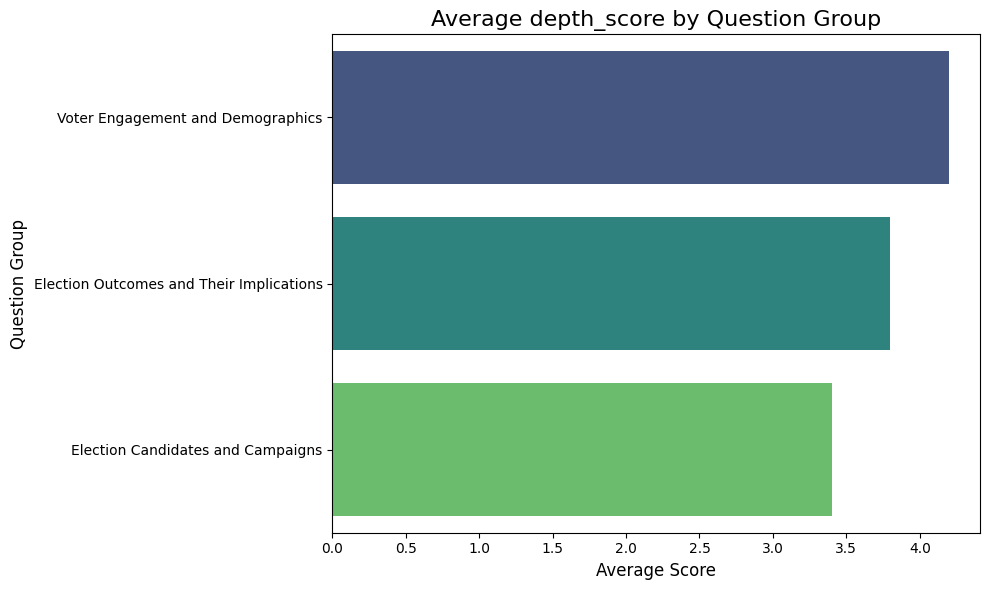

/var/folders/gj/wskdhgs57hn0jbs49qnhz9nh0000gn/T/ipykernel_90343/3006140863.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=g, y='group', data=grouped_scores, palette='viridis')


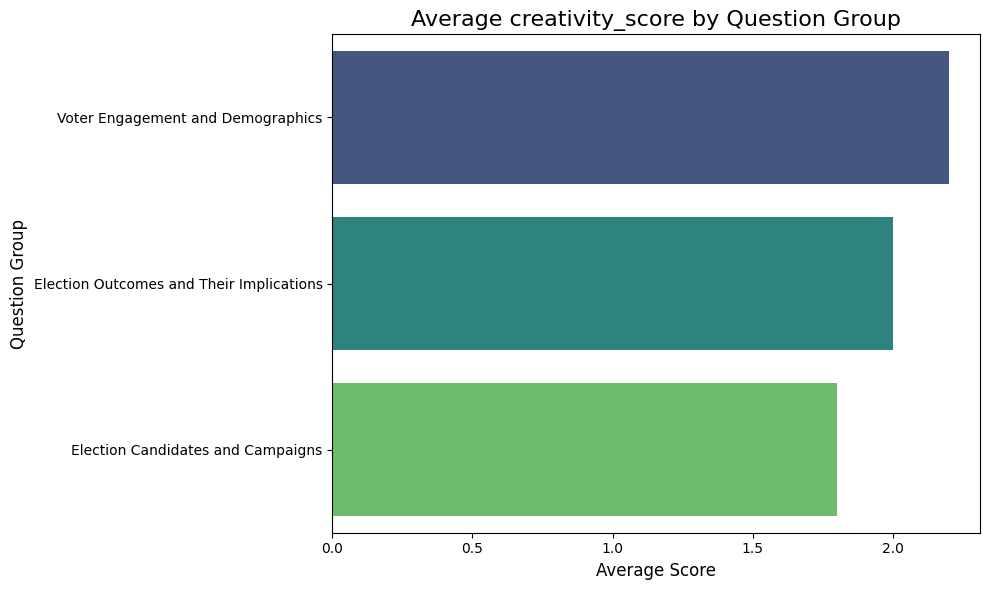

/var/folders/gj/wskdhgs57hn0jbs49qnhz9nh0000gn/T/ipykernel_90343/3006140863.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=g, y='group', data=grouped_scores, palette='viridis')


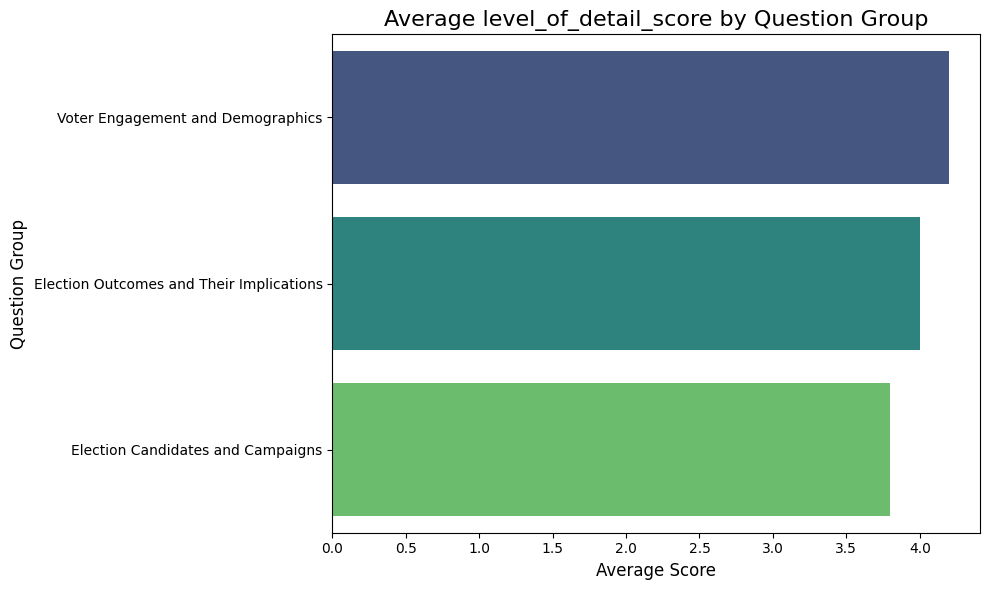

In [7]:
qa_data['group'] = human_eval['Group']

metrics = ['helpfulness_score', 'relevance_score', 'accuracy_score', 'depth_score', 'creativity_score', 'level_of_detail_score']
for g in metrics:
    grouped_scores = qa_data.groupby('group')[g].mean().reset_index()

    grouped_scores = grouped_scores.sort_values(by=g, ascending=False)

    plt.figure(figsize=(10, 6))
    sns.barplot(x=g, y='group', data=grouped_scores, palette='viridis')
    plt.title(f'Average {g} by Question Group', fontsize=16)
    plt.xlabel('Average Score', fontsize=12)
    plt.ylabel('Question Group', fontsize=12)
    plt.tight_layout()

    plt.show()


In [38]:
qa_data['group'].unique()

array(['Election Candidates and Campaigns',
       'Election Outcomes and Their Implications',
       'Voter Engagement and Demographics'], dtype=object)

In [39]:
qa_data['group'].value_counts()

group
Election Candidates and Campaigns           5
Election Outcomes and Their Implications    5
Voter Engagement and Demographics           5
Name: count, dtype: int64

/var/folders/gj/wskdhgs57hn0jbs49qnhz9nh0000gn/T/ipykernel_85918/1827794980.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='group', x=metric, data=grouped_scores, ax=axes[idx], palette='viridis')
/var/folders/gj/wskdhgs57hn0jbs49qnhz9nh0000gn/T/ipykernel_85918/1827794980.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='group', x=metric, data=grouped_scores, ax=axes[idx], palette='viridis')
/var/folders/gj/wskdhgs57hn0jbs49qnhz9nh0000gn/T/ipykernel_85918/1827794980.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='group',

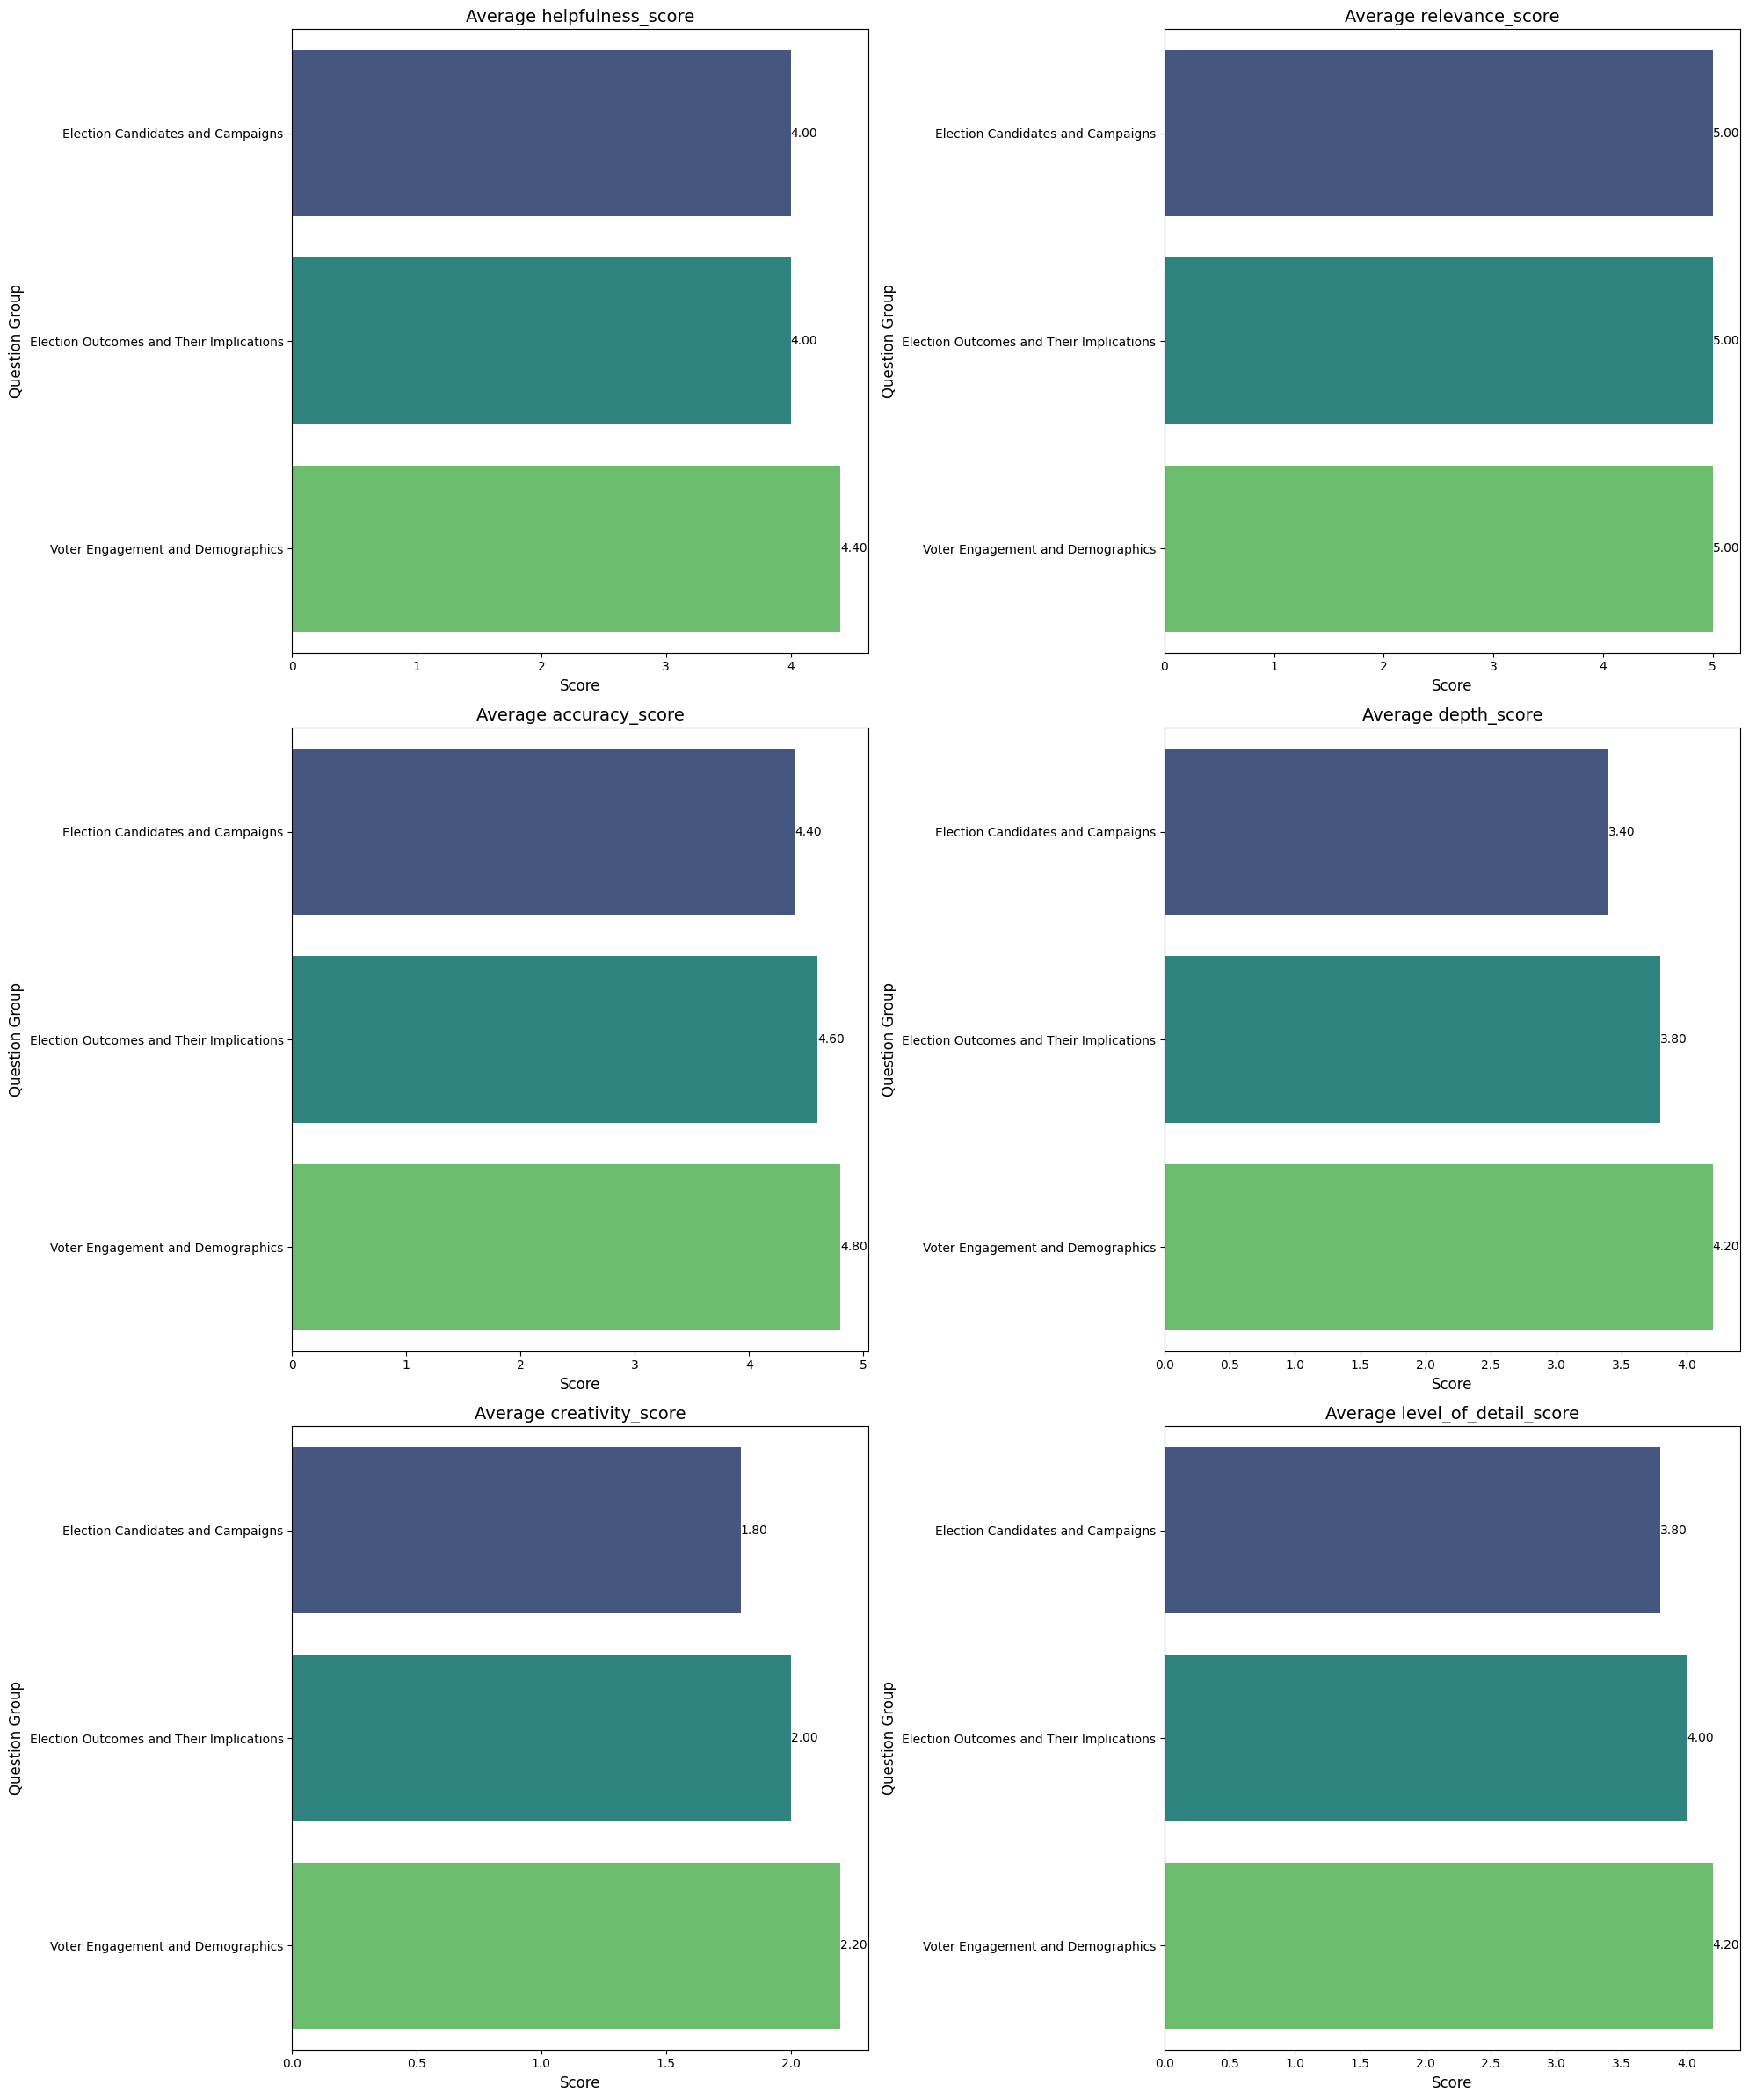

In [40]:
fig, axes = plt.subplots(3, 2, figsize=(20, 24))
axes = axes.flatten()

for idx, metric in enumerate(metrics):
    grouped_scores = qa_data.groupby('group')[metric].mean().reset_index()
    grouped_scores = grouped_scores.sort_values(by=metric, ascending=True)  # Changed to True for horizontal bars
    
    sns.barplot(y='group', x=metric, data=grouped_scores, ax=axes[idx], palette='viridis')
    axes[idx].set_title(f'Average {metric}', fontsize=14)
    axes[idx].set_xlabel('Score', fontsize=12)
    axes[idx].set_ylabel('Question Group', fontsize=12)
    
    for i, v in enumerate(grouped_scores[metric]):
        axes[idx].text(v, i, f'{v:.2f}', va='center')

plt.tight_layout()
plt.show()

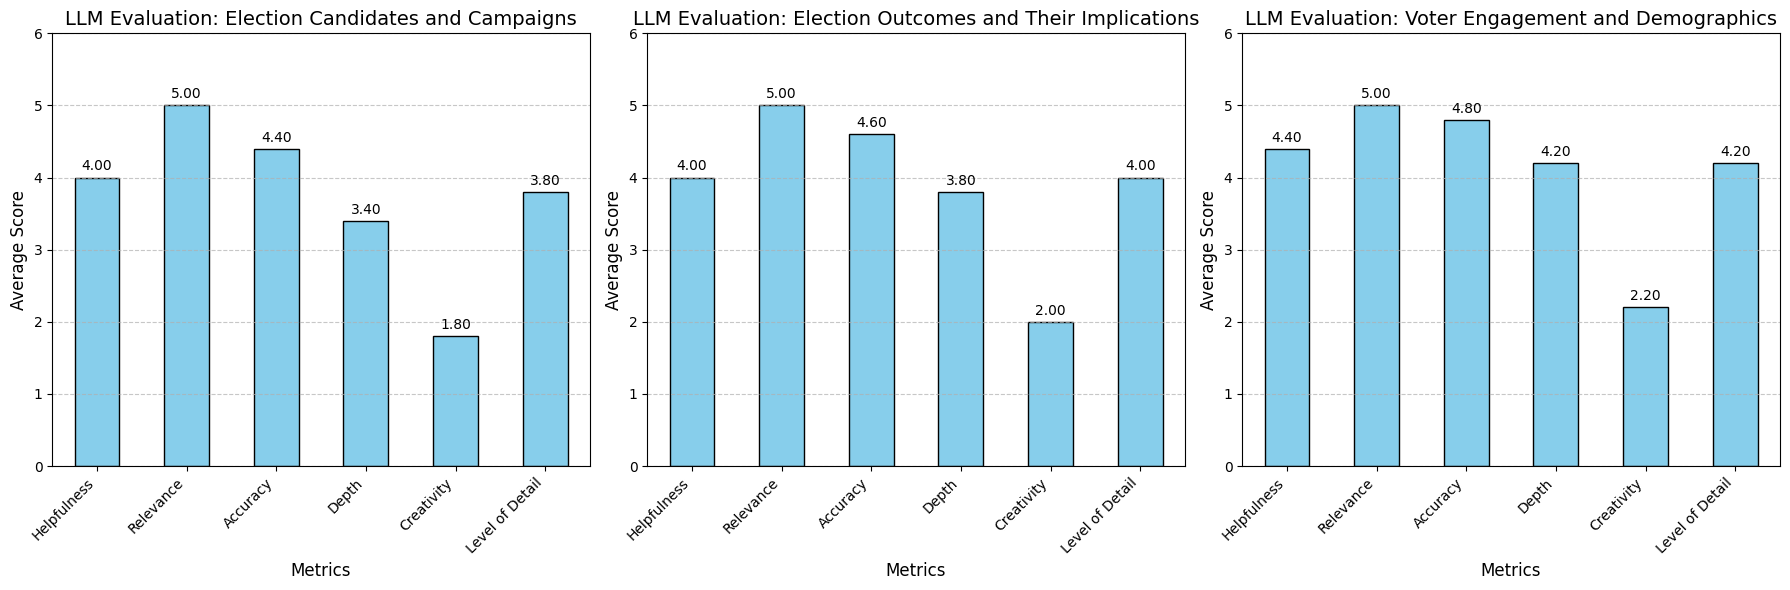

In [14]:
groups = qa_data['group'].unique()
clean_labels = ['Helpfulness', 'Relevance', 'Accuracy', 'Depth', 'Creativity', 'Level of Detail']

fig, axes = plt.subplots(1, 3, figsize=(18, 6))  

for ax, group in zip(axes, groups):
    group_data = qa_data[qa_data['group'] == group][metrics].mean()
    
    group_data.plot(kind='bar', color='skyblue', edgecolor='black', ax=ax)
    
    ax.set_title(f'LLM Evaluation: {group}', fontsize=14)
    ax.set_ylabel('Average Score', fontsize=12)
    ax.set_xlabel('Metrics', fontsize=12)
    ax.set_ylim(0, 6)
    ax.set_xticks(range(len(clean_labels)))
    ax.set_xticklabels(clean_labels, rotation=45, ha='right')
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    
    for i, v in enumerate(group_data):
        ax.text(i, v + 0.1, f'{v:.2f}', ha='center', fontsize=10)

plt.tight_layout()
plt.show()


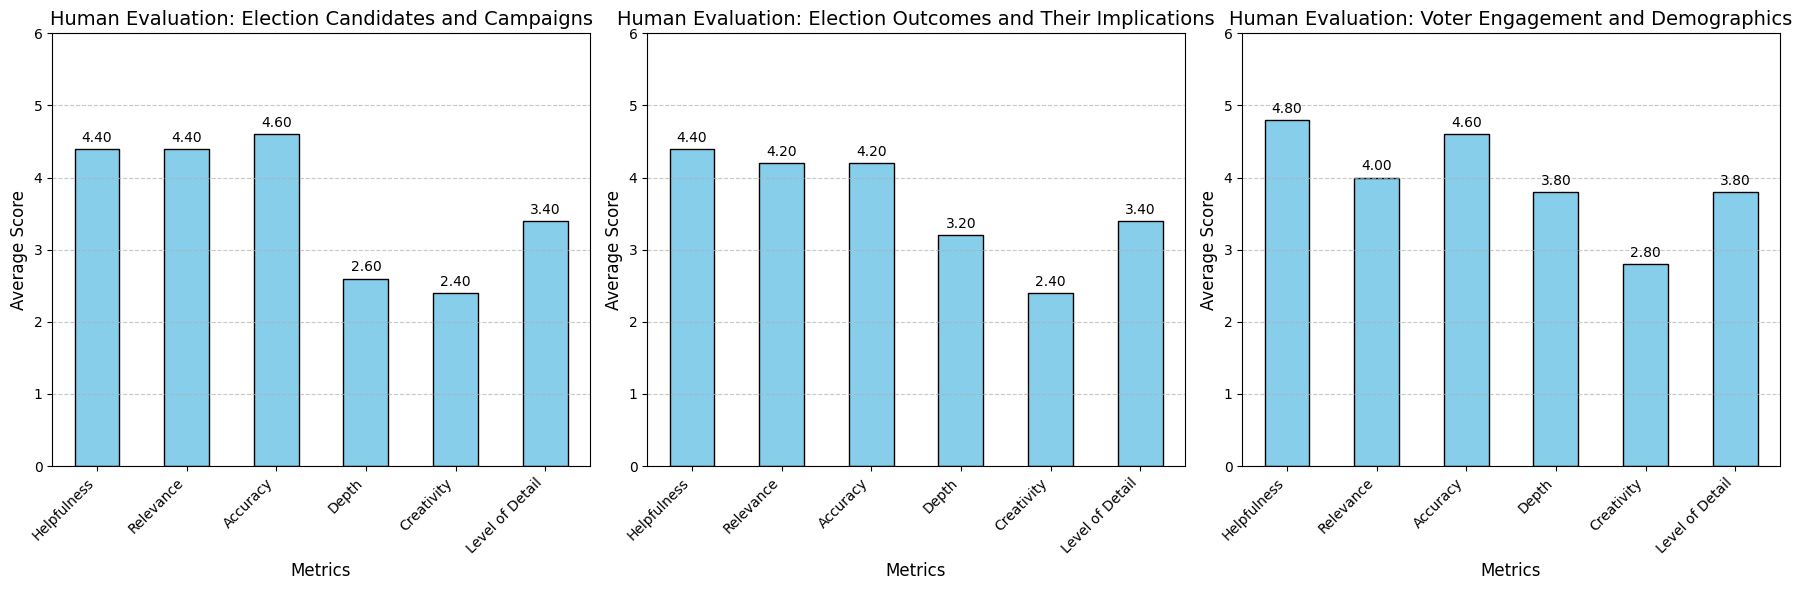

In [12]:
groups = human_eval['Group'].unique()
clean_labels = ['Helpfulness', 'Relevance', 'Accuracy', 'Depth', 'Creativity', 'Level of Detail']

fig, axes = plt.subplots(1, 3, figsize=(18, 6))  

for ax, group in zip(axes, groups):
    group_data = human_eval[human_eval['Group'] == group][clean_labels].mean()
    
    group_data.plot(kind='bar', color='skyblue', edgecolor='black', ax=ax)
    
    ax.set_title(f'Human Evaluation: {group}', fontsize=14)
    ax.set_ylabel('Average Score', fontsize=12)
    ax.set_xlabel('Metrics', fontsize=12)
    ax.set_ylim(0, 6)
    ax.set_xticks(range(len(clean_labels)))
    ax.set_xticklabels(clean_labels, rotation=45, ha='right')
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    
    for i, v in enumerate(group_data):
        ax.text(i, v + 0.1, f'{v:.2f}', ha='center', fontsize=10)

plt.tight_layout()
plt.show()


## checking counts

In [6]:
import os
print(os.getcwd())

/Users/anushakuppahally/Documents/GitHub/cs224v-project


In [7]:
import json
with open('./data/raw/articles.jsonl', 'r') as f:
    articles = [json.loads(line) for line in f]

articles[0]

{'requested_url': 'https://www.onenewspage.com/video/20201201/13497927/Cyber-Monday-Is-Winding-Down-Time-For-Giving.htm',
 'plain_text': "Cyber Monday Is Winding Down; Time For Giving Tuesday Giving Tuesday is Tuesday, Dec. 1 and North Texas nonprofits that serve the area's most vulnerable children need support now more than ever. Spirit Is Offering $20.21 Flights — But You Have to Act FastBook on Cyber Monday or Travel Tuesday to save big with Spirit. Baltimore County Schools To Close Monday & Tuesday Due To Ransomware Cyber AttackBaltimore County Schools To Close Monday & Tuesday Due To Ransomware Cyber Attack Kern County political analysts discuss general electionTuesday is the day we've been telling you about for quite some time. The general election is finally here and hundreds of voters rushed into the Kern County Elections office Monday to get their votes..",
 'published_date': '2020-11-03',
 'title': 'Cyber Monday Is Winding Down; Time For Giving Tuesday',
 'tags': 'CBS 11 News

In [8]:
len(articles)

851503

In [13]:
with open('./data/processed/articles.json', 'r') as f:
    articles = json.load(f)

print(len(articles["en"]))
print(len(articles["es"]))

173963
63222
